<a href="https://colab.research.google.com/github/pvdklei/modelsmakemodels/blob/master/sebas/report_notebooks/CNN_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries and packages

import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import tensorflow as tf
import tensorboard as tb
import visual_tools as vt
import utils
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
# define image loader

def loaders():
    traintransform = transforms.Compose([transforms.ToTensor(),
                                         transforms.Resize(128),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    testtransform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Resize(128),
                                        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    batch_size = 32
    num_workers = 2

    trainset = datasets.CIFAR10("/data/cifar10/train", train=True, transform=traintransform, download=True)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

    testset = datasets.CIFAR10("/data/cifar10/test", train=False, transform=testtransform, download=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    return trainloader, testloader

Extracting /data/cifar10/train/cifar-10-python.tar.gz to /data/cifar10/train


Extracting /data/cifar10/test/cifar-10-python.tar.gz to /data/cifar10/test




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


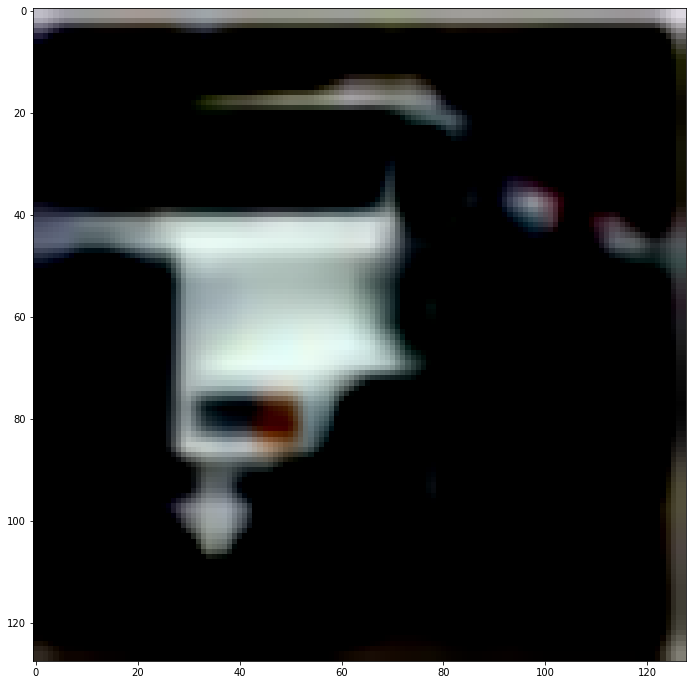

In [ ]:
# visualize data

trainloader, _ = loaders()
images, labels = next(iter(trainloader))
vt.show_image(images[0])

In [ ]:
# Make an autoencoder with 3 convolutions, a kernel size of 4 and a stride of 1

class MyModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=4, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 32, kernel_size=4, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=4, stride=1, padding=1)
        self.fc1 = nn.Linear(14400, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(p=0.2)

    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.drop(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.drop(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model1 = MyModel1()
model1(images).shape

torch.Size([32, 10])

In [ ]:
# # Make an autoencoder with 3 convolutions, a kernel size of 8 and a stride of 1

class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=8, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 32, kernel_size=8, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=8, stride=1, padding=1)
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.drop(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.drop(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model2 = MyModel2()
model2(images).shape

RuntimeError: ignored

In [ ]:
# Make an autoencoder with 4 convolutions, a kernel size of 8 and a stride of 1

class MyModel3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=8, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 32, kernel_size=8, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=8, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=8, stride=1, padding=1)
        self.fc1 = nn.Linear(1152, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.drop(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.drop(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model3 = MyModel3()
model3(images).shape

torch.Size([32, 10])

In [ ]:
#  Make an autoencoder with 3 convolutions, a kernel size of 4 and a stride of 2

class MyModel4(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(8, 32, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.drop(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.drop(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model4 = MyModel4()
model4(images).shape

torch.Size([32, 10])

In [ ]:
# define training function

def train(model, 
          loaders, 
          optimizer=None,
          criterion=nn.CrossEntropyLoss(), 
          epochs=5, 
          reload_=False):
        import time
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        
        if optimizer == None:
            optimizer = optim.Adam(params=model.parameters(), lr=0.001)
        trainloader, testloader = loaders()
    
        print("Training on: ", device)
        train_losses = []
        test_losses = []
        accuracies = []
        start_time = time.time()

        for epoch in range(epochs):
            
            print(f"New epoch: {epoch}")
            # training
            trainloss = []
            for images, labels in trainloader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                out = model(images)
                loss = criterion(out, labels)
                loss.backward()
                optimizer.step()
                trainloss.append(loss.item())
            trainloss = np.mean(trainloss)
            train_losses.append(trainloss)
            print(f"Training loss: {round(trainloss, 3)}")

            
            

            # validation
            testloss = []
            for images, labels in testloader:

                images, labels = images.to(device), labels.to(device)
                with torch.no_grad():
                    out = model(images)
                    loss = criterion(out, labels)
                    testloss.append(loss.item())
            testloss = np.mean(testloss)

            test_losses.append(testloss)
            print(f"Validation loss: {round(testloss, 3)}")
    
            # final accuracy
            
            accuracy = []
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                with torch.no_grad():
                    out = model(images)
                    topv, topi = torch.topk(out, 1, dim=1)
                    labels.resize_(*topi.shape)
                    eq = topi == labels
                    acc = torch.mean(eq.type(torch.FloatTensor))
                    accuracy.append(acc.item())
            accuracy = np.mean(accuracy)
            accuracies.append(accuracy)
            print(f"The accuracy is: {round(accuracy * 100, 1)}%")
            if reload_:
                trainloader, testloader = loaders()


            
    
            
    
        end_time = time.time()
        time = end_time - start_time
        print(time)
        return(time, train_losses, test_losses, accuracies)
  

In [ ]:
# train first model

time1, train_losses1, test_losses1, accuracies1 = train(model=model1,
               loaders=loaders,
               optimizer=optim.Adam(params=model1.parameters(), lr=0.001),
               criterion=nn.CrossEntropyLoss(), reload_=True,
               epochs=10)

Files already downloaded and verified
Files already downloaded and verified
Training on:  cuda
New epoch: 0
Training loss: 1.492
Validation loss: 1.221
The accuracy is: 55.3%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 1
Training loss: 1.12
Validation loss: 1.062
The accuracy is: 62.5%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 2
Training loss: 0.923
Validation loss: 0.931
The accuracy is: 67.1%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 3
Training loss: 0.806
Validation loss: 0.945
The accuracy is: 67.4%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 4
Training loss: 0.714
Validation loss: 0.881
The accuracy is: 69.1%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 5
Training loss: 0.638
Validation loss: 0.896
The accuracy is: 69.9%
Files already downloaded and verified
Files al

In [ ]:
# train second model

time2, train_losses2, test_losses2, accuracies2 = train(model=model2,
               loaders=loaders,
               optimizer=optim.Adam(params=model2.parameters(), lr=0.001),
               criterion=nn.CrossEntropyLoss(),reload_=True,
               epochs=10)

Files already downloaded and verified
Files already downloaded and verified
Training on:  cuda
New epoch: 0
Training loss: 1.531
Validation loss: 1.265
The accuracy is: 54.7%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 1
Training loss: 1.156
Validation loss: 1.076
The accuracy is: 62.3%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 2
Training loss: 0.975
Validation loss: 1.004
The accuracy is: 65.3%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 3
Training loss: 0.857
Validation loss: 0.96
The accuracy is: 67.0%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 4
Training loss: 0.784
Validation loss: 0.958
The accuracy is: 67.2%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 5
Training loss: 0.719
Validation loss: 0.913
The accuracy is: 69.7%
Files already downloaded and verified
Files al

In [ ]:
# train thrid model

time3, train_losses3, test_losses3, accuracies3 = train(model=model3,
               loaders=loaders,
               optimizer=optim.Adam(params=model3.parameters(), lr=0.001),
               criterion=nn.CrossEntropyLoss(),reload_=True,
               epochs=10)

Files already downloaded and verified
Files already downloaded and verified
Training on:  cuda
New epoch: 0
Training loss: 1.63
Validation loss: 1.307
The accuracy is: 52.8%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 1
Training loss: 1.195
Validation loss: 1.314
The accuracy is: 56.8%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 2
Training loss: 1.019
Validation loss: 0.992
The accuracy is: 65.8%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 3
Training loss: 0.928
Validation loss: 0.973
The accuracy is: 67.7%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 4
Training loss: 0.855
Validation loss: 0.889
The accuracy is: 69.7%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 5
Training loss: 0.81
Validation loss: 0.903
The accuracy is: 70.3%
Files already downloaded and verified
Files alr

In [ ]:
# train fourth model

time4, train_losses4, test_losses4, accuracies4 = train(model=model4,
               loaders=loaders,
               optimizer=optim.Adam(params=model4.parameters(), lr=0.001),
               criterion=nn.CrossEntropyLoss(),reload_=True,
               epochs=40)

Files already downloaded and verified
Files already downloaded and verified
Training on:  cuda
New epoch: 0
Training loss: 1.643
Validation loss: 1.406
The accuracy is: 48.6%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 1
Training loss: 1.357
Validation loss: 1.285
The accuracy is: 53.4%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 2
Training loss: 1.236
Validation loss: 1.197
The accuracy is: 56.8%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 3
Training loss: 1.149
Validation loss: 1.112
The accuracy is: 60.1%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 4
Training loss: 1.087
Validation loss: 1.096
The accuracy is: 60.8%
Files already downloaded and verified
Files already downloaded and verified
New epoch: 5
Training loss: 1.042
Validation loss: 1.076
The accuracy is: 61.2%
Files already downloaded and verified
Files a

In [ ]:
# save models

torch.save(model1.state_dict(), 'CNN_341.model')
torch.save(model2.state_dict(), 'CNN_381.model')
torch.save(model3.state_dict(), 'CNN_481.model')
torch.save(model4.state_dict(), 'CNN_342.model')